In [1]:
import glob
import pandas  as pd
import numpy   as np
import nibabel as nib
import matplotlib.pyplot as plt
import os
import cv2
import torch
from pyimagesearch import config
from pyimagesearch import model
from pyimagesearch import dataset


%matplotlib inline

In [2]:
print(os.getcwd())

/Users/hafeez/Desktop/U-NET_nifti_reading


In [3]:
# base path of the dataset
# nifti testing/Covid-19 lungs nifti
DATASET_PATH = os.path.join(os.getcwd(), "covid19-ct-scans")
DATASET_PATH 

'/Users/hafeez/Desktop/U-NET_nifti_reading/covid19-ct-scans'

In [4]:
# define the path to the images and masks dataset 
IMAGE_DATASET_PATH = os.path.join(DATASET_PATH, "ct_scans")
MASK_DATASET_PATH = os.path.join(DATASET_PATH, "infection_mask")

In [5]:
#nifti_files_testing/input/covid19-ct-scans/ct_scans
IMAGE_DATASET_PATH

'/Users/hafeez/Desktop/U-NET_nifti_reading/covid19-ct-scans/ct_scans'

In [6]:
#nifti_files_testing/input/covid19-ct-scans/lung_mask
MASK_DATASET_PATH

'/Users/hafeez/Desktop/U-NET_nifti_reading/covid19-ct-scans/infection_mask'

In [7]:
# Read and examine metadata 
#input/covid19-ct-scans/metadata.csv
raw_data = pd.read_csv(r"covid19-ct-scans/metadata_.csv")
raw_data.head(10)

ct_scans                      lung_mask  \
0  ct_scans/coronacases_org_001.nii  lung_mask/coronacases_001.nii   
1  ct_scans/coronacases_org_002.nii  lung_mask/coronacases_002.nii   
2  ct_scans/coronacases_org_003.nii  lung_mask/coronacases_003.nii   
3  ct_scans/coronacases_org_004.nii  lung_mask/coronacases_004.nii   
4  ct_scans/coronacases_org_005.nii  lung_mask/coronacases_005.nii   
5  ct_scans/coronacases_org_006.nii  lung_mask/coronacases_006.nii   
6  ct_scans/coronacases_org_007.nii  lung_mask/coronacases_007.nii   
7  ct_scans/coronacases_org_008.nii  lung_mask/coronacases_008.nii   
8  ct_scans/coronacases_org_009.nii  lung_mask/coronacases_009.nii   
9  ct_scans/coronacases_org_010.nii  lung_mask/coronacases_010.nii   

                       infection_mask  \
0  infection_mask/coronacases_001.nii   
1  infection_mask/coronacases_002.nii   
2  infection_mask/coronacases_003.nii   
3  infection_mask/coronacases_004.nii   
4  infection_mask/coronacases_005.nii   
5  infection_mask/coronacases_006.nii   
6  infection_mask/coronacases_007.nii   
7  infection_mask/coronacases_008.nii   
8  infection_mask/coronacases_009.nii   
9  infection_mask/coronacases_010.nii   

                       lung_and_infection_mask  
0  lung_and_infection_mask/coronacases_001.nii  
1  lung_and_infection_mask/coronacases_002.nii  
2  lung_and_infection_mask/coronacases_003.nii  
3  lung_and_infection_mask/coronacases_004.nii  
4  lung_and_infection_mask/coronacases_005.nii  
5  lung_and_infection_mask/coronacases_006.nii  
6  lung_and_infection_mask/coronacases_007.nii  
7  lung_and_infection_mask/coronacases_008.nii  
8  lung_and_infection_mask/coronacases_009.nii  
9  lung_and_infection_mask/coronacases_010.nii

# loading images in array

In [8]:
# loading images in array
def read_nii(filepath):
    '''
    Reads .nii file and returns pixel array
    '''
    ct_scan = nib.load(filepath)
    array   = ct_scan.get_fdata()
    array   = np.rot90(np.array(array))
    return(array)

In [9]:
os.path.join(DATASET_PATH, raw_data.loc[0,'ct_scans'])

'/Users/hafeez/Desktop/U-NET_nifti_reading/covid19-ct-scans/ct_scans/coronacases_org_001.nii'

In [10]:
# Read sample
sample_ct   = read_nii(os.path.join(DATASET_PATH,raw_data.loc[0,'ct_scans']))
sample_lung = read_nii(os.path.join(DATASET_PATH,raw_data.loc[0,'lung_mask']))
sample_infe = read_nii(os.path.join(DATASET_PATH,raw_data.loc[0,'infection_mask']))
sample_all  = read_nii(os.path.join(DATASET_PATH,raw_data.loc[0,'lung_and_infection_mask']))

# Size of CT Scan images

In [11]:
sample_ct.shape

(512, 512, 301)

# Plot all all available annotations images - Single slice

In [12]:
def plot_sample(array_list, color_map = 'nipy_spectral'):
    '''
    Plots and a slice with all available annotations
    '''
    fig = plt.figure(figsize=(18,15))

    plt.subplot(1,4,1)
    plt.imshow(array_list[0], cmap='bone')
    plt.title('Original CT-scan Image')

    plt.subplot(1,4,2)
    plt.imshow(array_list[0], cmap='bone')
    plt.imshow(array_list[1], alpha=0.5, cmap=color_map)
    plt.title('Covid-19 Original Mask')

    plt.subplot(1,4,3)
    plt.imshow(array_list[0], cmap='bone')
    plt.imshow(array_list[2], alpha=0.5, cmap=color_map)
    plt.title('Lungs Mask')

    plt.subplot(1,4,4)
    plt.imshow(array_list[0], cmap='bone')
    plt.imshow(array_list[3], alpha=0.5, cmap=color_map)
    plt.title('Lungs and Covid-19 Infection Mask')
    
    
    plt.show()

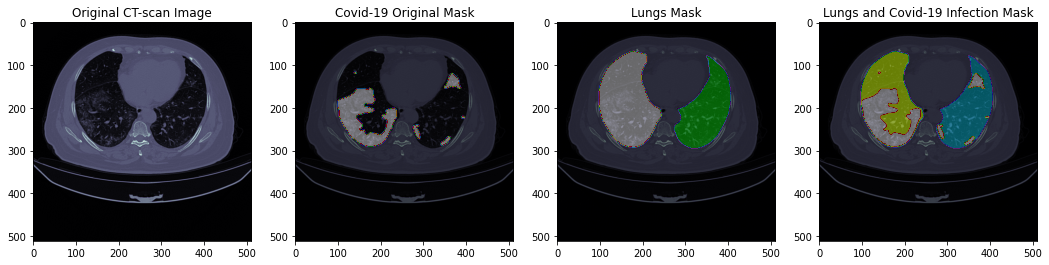

In [13]:
# Examine one slice of a ct scan and its annotations
plot_sample([sample_ct[...,120],  sample_infe[...,120], sample_lung[...,120], sample_all[...,120]])

# Plot all available annotations images - Multiple slices

That's an example from a single slice, lets do the same for multiple slices in the same exam.

In [14]:
def bulk_plot_sample(array_list, index_list):
    '''
    Plots multiple slices, wrapper of plot_sample
    '''
    for index_value in index_list:
        plot_sample([array_list[0][...,index_value], array_list[1][...,index_value], array_list[2][...,index_value], array_list[3][...,index_value]])

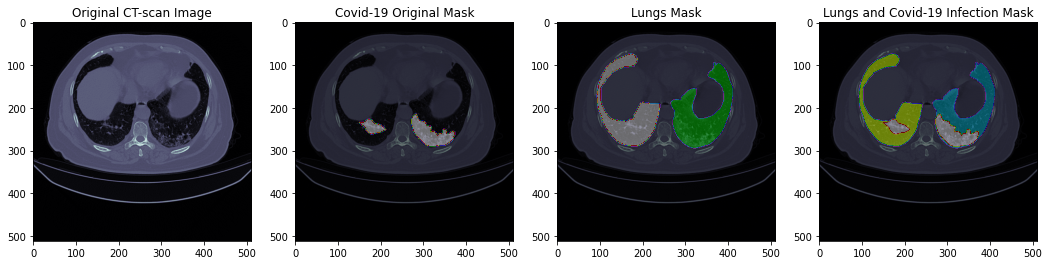

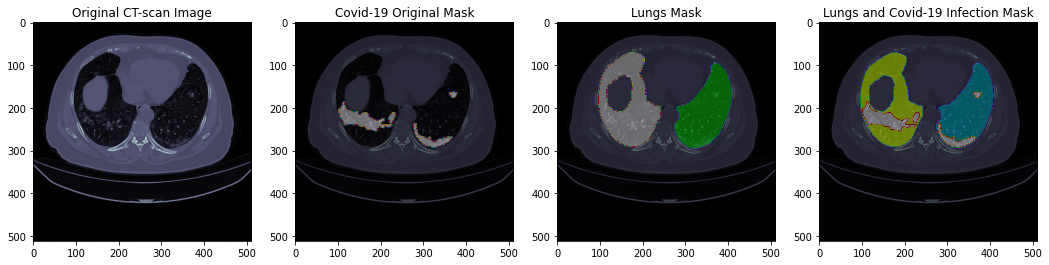

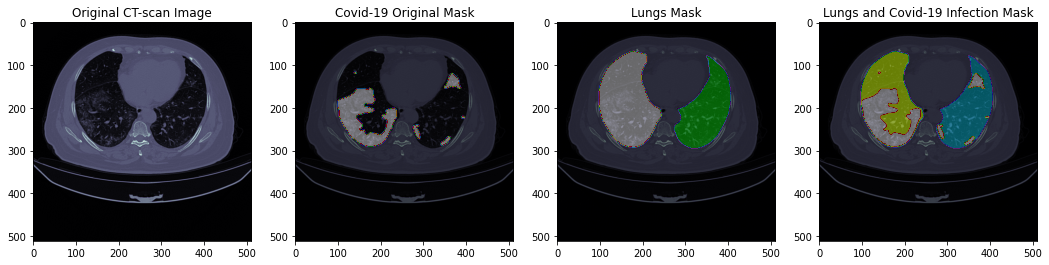

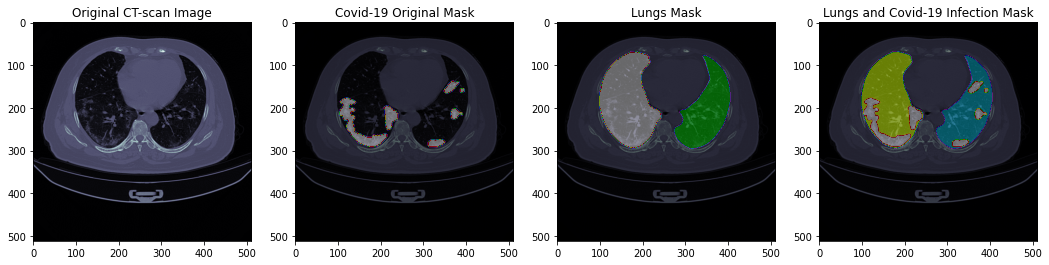

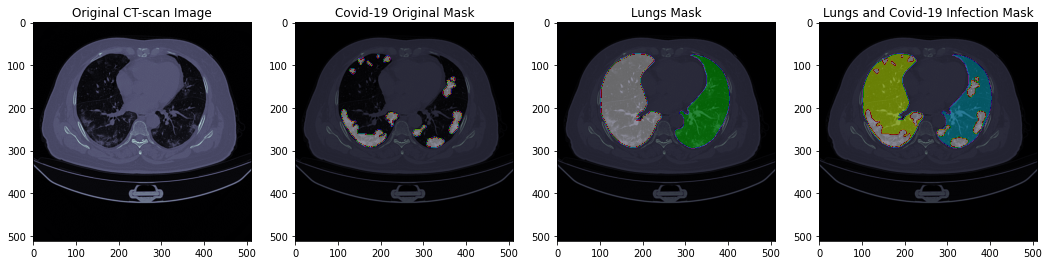

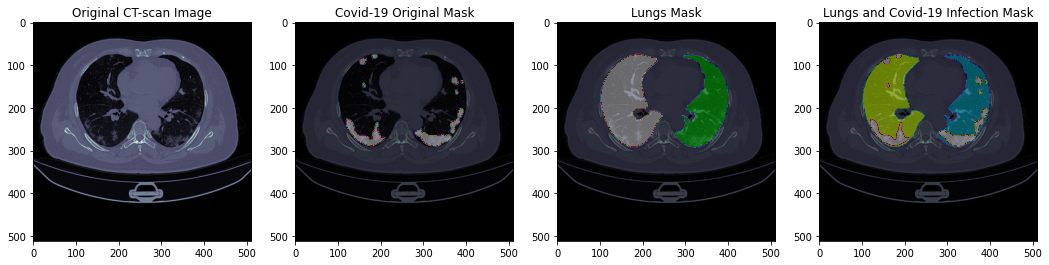

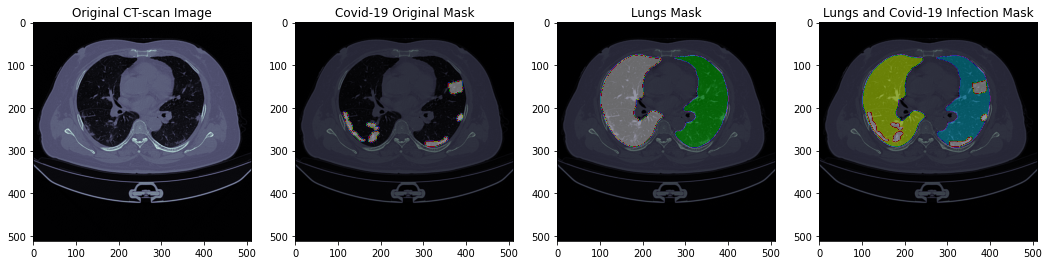

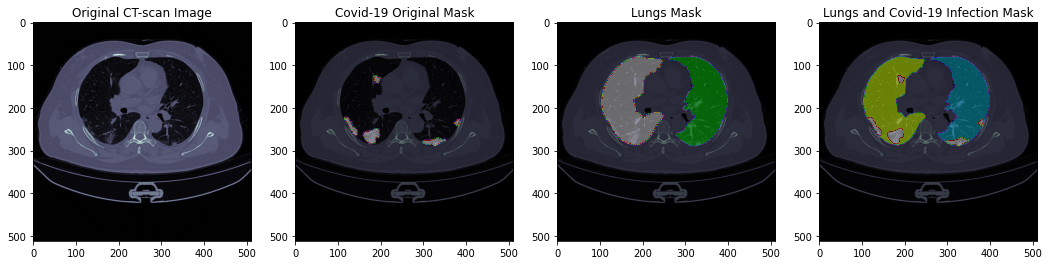

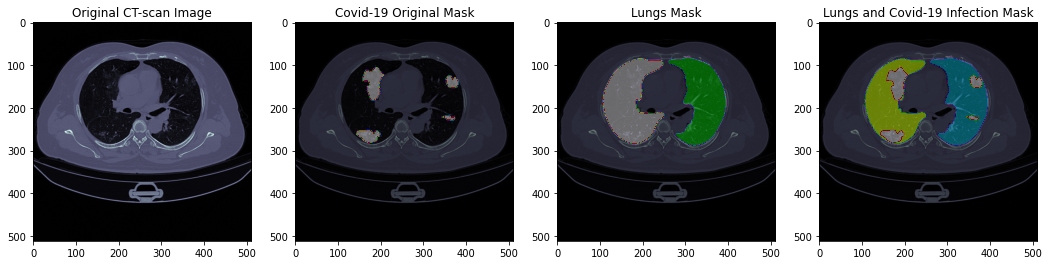

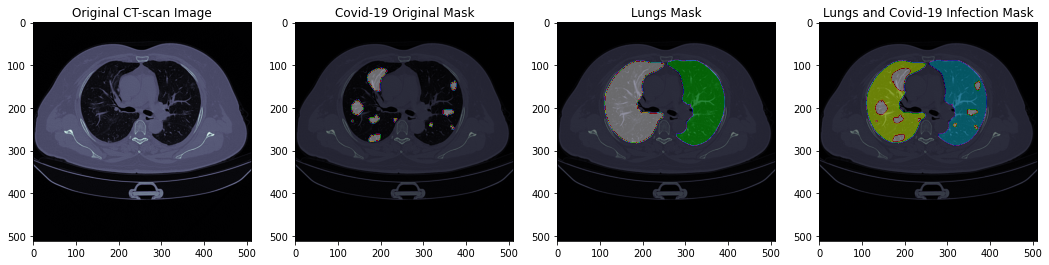

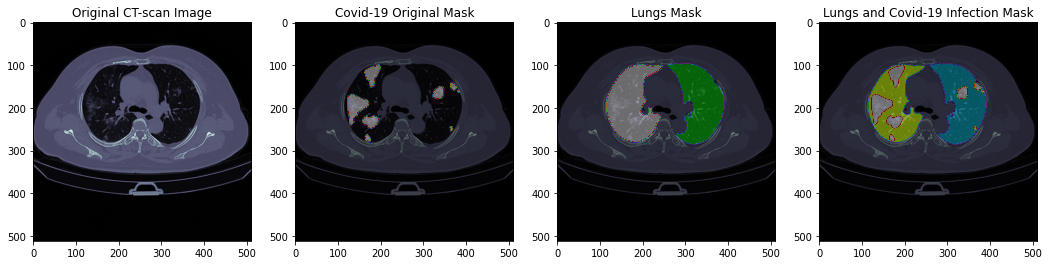

In [15]:
# Examine multiple slices of a ct scan and its annotations
bulk_plot_sample([sample_ct, sample_infe, sample_lung, sample_all], index_list=[100,110,120,130,140,150,160,170,180,190,200]) 

# Plot Original CT Images with Corrensponding Masks - Single Slice

In [16]:
def plt_ctimage_with_mask(array_list, color_map = 'nipy_spectral'):
    
    fig = plt.figure(figsize = (18, 15))
    
    plt.subplot(1,4,1)
    plt.imshow(array_list[0], cmap='bone')
    plt.title('Original CT-scan Image')

    plt.subplot(1,4,2)
    plt.imshow(array_list[0], cmap='bone')
    plt.imshow(array_list[1], alpha=0.5, cmap=color_map)
    plt.title('Covid-19 Original Mask')
    
    plt.show()

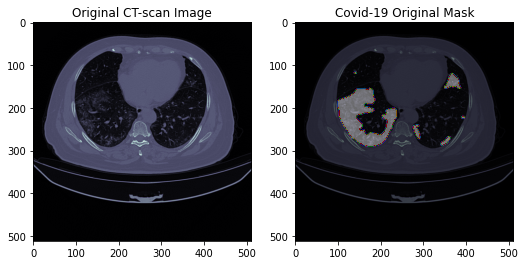

In [17]:
plt_ctimage_with_mask([sample_ct[...,120],sample_infe[...,120]])

# Plot Original CT Images with Corrensponding Masks - Multiple Slice

In [18]:
def plot_img_mask(array_list, color_map = 'nipy_spectral'):
    '''
    Plots and a slice with all available annotations
    '''
    fig = plt.figure(figsize=(18,15))

    plt.subplot(1,4,1)
    plt.imshow(array_list[0], cmap='bone')
    plt.title('Original CT-scan Image')

    plt.subplot(1,4,2)
    plt.imshow(array_list[0], cmap='bone')
    plt.imshow(array_list[1], alpha=0.5, cmap=color_map)
    plt.title('Covid-19 Original Mask')
    
    plt.show()

In [19]:
def multi_plt_ctimages_with_masks(array_list, index_list):
    '''
    Plots multiple slices, wrapper of plot_sample
    '''
    for index_value in index_list:
        plot_img_mask([array_list[0][...,index_value], array_list[1][...,index_value]])

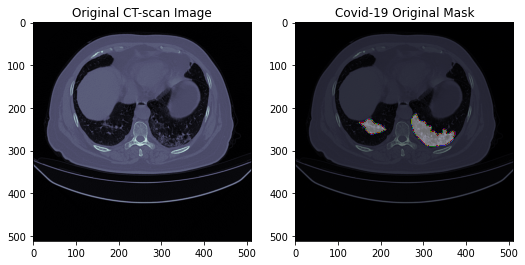

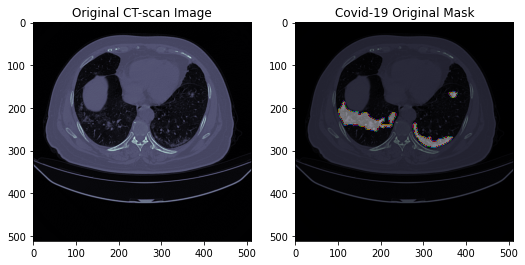

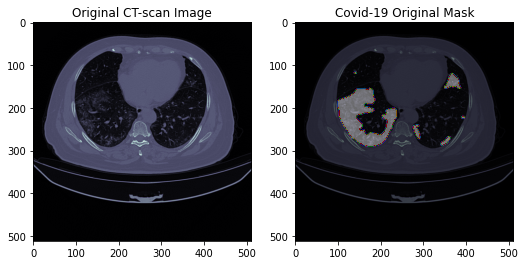

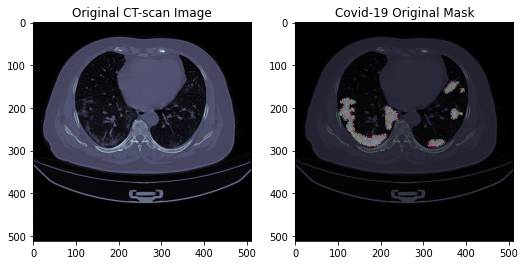

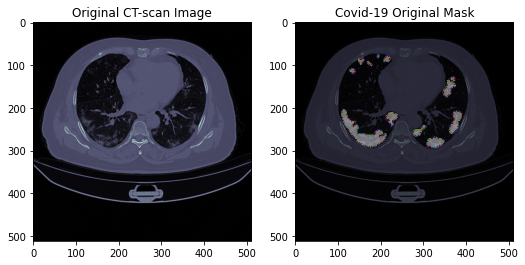

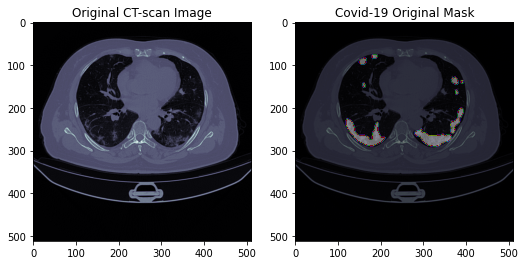

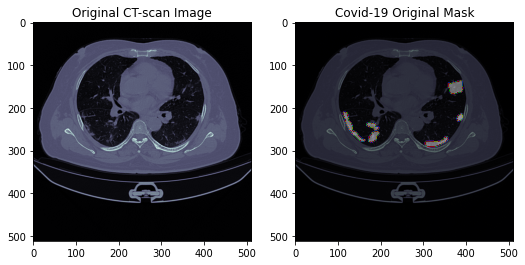

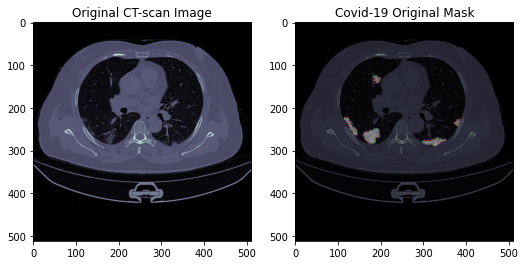

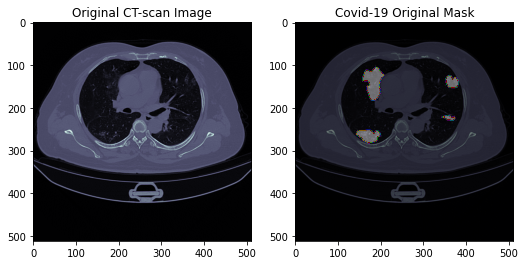

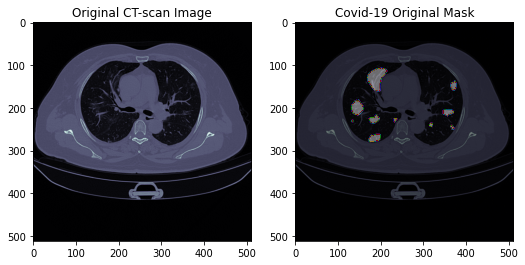

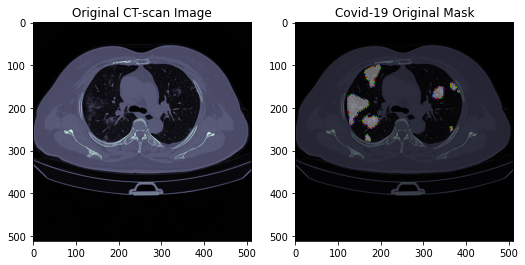

In [20]:
# Examine multiple slices of a ct scan and its corresponding masks
multi_plt_ctimages_with_masks([sample_ct, sample_infe], index_list=[100,110,120,130,140,150,160,170,180,190,200])

# Reshaping Nifti images 128x128 / Resize CT scans & infection masks 

In [21]:
lungs = []
infections = []
img_size = 128

for i in range(len(raw_data)):
    ct_images = read_nii(os.path.join(DATASET_PATH,raw_data['ct_scans'][i]))
    #read_nii(os.path.join(DATASET_PATH,raw_data.loc[0,'ct_scans']))
    infect = read_nii(os.path.join(DATASET_PATH,raw_data['infection_mask'][i]))
    
    for ii in range(ct_images.shape[0]):
        lung_img = cv2.resize(ct_images[ii], 
        dsize = (img_size, img_size),interpolation = cv2.INTER_LANCZOS4).astype('uint8')

        infec_img = cv2.resize(infect[ii],
        dsize=(img_size, img_size),interpolation = cv2.INTER_LANCZOS4).astype('uint8')
        
        lungs.append(lung_img[..., np.newaxis])
        infections.append(infec_img[..., np.newaxis])

In [22]:
lungs = np.array(lungs)
infections = np.array(infections)

print(f"The shape of the lung CT scans is {lungs.shape}.")
print(f"The shape of the infection masks is {infections.shape}.")

The shape of the lung CT scans is (11191, 128, 128, 1).
The shape of the infection masks is (11191, 128, 128, 1).


# pyimagesearch - config.py

In [23]:
DATASET_PATH = os.path.join(os.getcwd(), "covid19-ct-scans/dataset","train")
DATASET_PATH

'/Users/hafeez/Desktop/U-NET_nifti_reading/covid19-ct-scans/dataset/train'

In [24]:
# import the necessary packages
import torch
import os
#/Users/hafeez/Downloads/U-NET_nifti_reading/input/covid19-ct-scans/dataset/train

# base path of the dataset
DATASET_PATH = os.path.join(os.getcwd(), "covid19-ct-scans/dataset","train")

# define the path to the images and masks dataset 
IMAGE_DATASET_PATH = os.path.join(DATASET_PATH, "images")
MASK_DATASET_PATH = os.path.join(DATASET_PATH, "masks")

# define the test split
TEST_SPLIT = 0.20

# determine the device to be used for training and evaluation
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

# determine if we will be pinning memory during data loading
PIN_MEMORY = True if DEVICE == "cuda" else False

In [25]:
print(os.getcwd())

/Users/hafeez/Desktop/U-NET_nifti_reading


In [26]:
print(os.listdir())

['.DS_Store', 'predict.py', 'nii to png', 'testing_segmentation.ipynb', 'pyimagesearch', 'train.py', 'covid19-ct-scans', '.ipynb_checkpoints', '.git']


In [27]:
print(DATASET_PATH )

/Users/hafeez/Desktop/U-NET_nifti_reading/covid19-ct-scans/dataset/train


In [28]:
print(IMAGE_DATASET_PATH)

/Users/hafeez/Desktop/U-NET_nifti_reading/covid19-ct-scans/dataset/train/images


In [29]:
print(MASK_DATASET_PATH)

/Users/hafeez/Desktop/U-NET_nifti_reading/covid19-ct-scans/dataset/train/masks


In [30]:
BASE_OUTPUT = os.path.join(DATASET_PATH, "output")
print(BASE_OUTPUT)

/Users/hafeez/Desktop/U-NET_nifti_reading/covid19-ct-scans/dataset/train/output


In [31]:
num_workers= os.cpu_count()
print(num_workers)

8


In [32]:
# define the number of channels in the input, number of classes,
# and number of levels in the U-Net model
NUM_CHANNELS = 1
NUM_CLASSES = 1
NUM_LEVELS = 3

# initialize learning rate, number of epochs to train for, and the
# batch size
INIT_LR = 0.001
NUM_EPOCHS = 50
BATCH_SIZE = 64

# define the input image dimensions
INPUT_IMAGE_WIDTH = 128
INPUT_IMAGE_HEIGHT = 128

# define threshold to filter weak predictions
THRESHOLD = 0.5

# define the path to the base output directory
BASE_OUTPUT = os.path.join(DATASET_PATH, "output")

# define the path to the output serialized model, model training
# plot, and testing image paths
MODEL_PATH = os.path.join(BASE_OUTPUT, "unet_covid-19.pth")
LOSS_PLOT_PATH = os.path.sep.join([BASE_OUTPUT, "loss_plot.png"])
ACCURACY_PLOT_PATH = os.path.sep.join([BASE_OUTPUT, "accuracy_plot.png"])
TEST_PATHS = os.path.sep.join([BASE_OUTPUT, "test_paths.txt"])

print("[INFO] all parameters are set for the training...")

[INFO] all parameters are set for the training...


In [33]:
BASE_OUTPUT

'/Users/hafeez/Desktop/U-NET_nifti_reading/covid19-ct-scans/dataset/train/output'

In [34]:
MODEL_PATH

'/Users/hafeez/Desktop/U-NET_nifti_reading/covid19-ct-scans/dataset/train/output/unet_covid-19.pth'

In [35]:
TEST_PATHS

'/Users/hafeez/Desktop/U-NET_nifti_reading/covid19-ct-scans/dataset/train/output/test_paths.txt'

In [36]:
LOSS_PLOT_PATH

'/Users/hafeez/Desktop/U-NET_nifti_reading/covid19-ct-scans/dataset/train/output/loss_plot.png'

In [37]:
ACCURACY_PLOT_PATH

'/Users/hafeez/Desktop/U-NET_nifti_reading/covid19-ct-scans/dataset/train/output/accuracy_plot.png'

# Training Our Segmentation Model (train.py)

In [38]:
! pip install torch torchvision
! pip install matplotlib
! pip install opencv-contrib-python
! pip install imutils
! pip install scikit-learn
! pip install tqdm

In [39]:

from pyimagesearch import config
from pyimagesearch import dataset
from pyimagesearch import model
from pyimagesearch.dataset import SegmentationDataset
from pyimagesearch.model import UNet
from torch.nn import BCEWithLogitsLoss
from torch.optim import Adam
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
import torch
import torch.nn.functional as F
from torchvision import transforms
from torchvision import models
from torchsummary import summary
from imutils import paths
from tqdm import tqdm
import matplotlib.pyplot as plt
import time
import os
from os import listdir
from natsort import natsorted

loading our data and structure the data loading pipeline.

In [40]:
# load the image and mask filepaths in a sorted manner
imagePaths = natsorted(list(paths.list_images(config.IMAGE_DATASET_PATH)))
maskPaths = natsorted(list(paths.list_images(config.MASK_DATASET_PATH)))

In [41]:
# path for images
imagePaths

['/Users/hafeez/Desktop/U-NET_nifti_reading/covid19-ct-scans/dataset/train/images/image.1.png',
 '/Users/hafeez/Desktop/U-NET_nifti_reading/covid19-ct-scans/dataset/train/images/image.2.png',
 '/Users/hafeez/Desktop/U-NET_nifti_reading/covid19-ct-scans/dataset/train/images/image.3.png',
 '/Users/hafeez/Desktop/U-NET_nifti_reading/covid19-ct-scans/dataset/train/images/image.4.png',
 '/Users/hafeez/Desktop/U-NET_nifti_reading/covid19-ct-scans/dataset/train/images/image.5.png',
 '/Users/hafeez/Desktop/U-NET_nifti_reading/covid19-ct-scans/dataset/train/images/image.6.png',
 '/Users/hafeez/Desktop/U-NET_nifti_reading/covid19-ct-scans/dataset/train/images/image.7.png',
 '/Users/hafeez/Desktop/U-NET_nifti_reading/covid19-ct-scans/dataset/train/images/image.8.png',
 '/Users/hafeez/Desktop/U-NET_nifti_reading/covid19-ct-scans/dataset/train/images/image.9.png',
 '/Users/hafeez/Desktop/U-NET_nifti_reading/covid19-ct-scans/dataset/train/images/image.10.png',
 '/Users/hafeez/Desktop/U-NET_nifti_rea

In [42]:
# path for images
maskPaths

['/Users/hafeez/Desktop/U-NET_nifti_reading/covid19-ct-scans/dataset/train/masks/image.1.png',
 '/Users/hafeez/Desktop/U-NET_nifti_reading/covid19-ct-scans/dataset/train/masks/image.2.png',
 '/Users/hafeez/Desktop/U-NET_nifti_reading/covid19-ct-scans/dataset/train/masks/image.3.png',
 '/Users/hafeez/Desktop/U-NET_nifti_reading/covid19-ct-scans/dataset/train/masks/image.4.png',
 '/Users/hafeez/Desktop/U-NET_nifti_reading/covid19-ct-scans/dataset/train/masks/image.5.png',
 '/Users/hafeez/Desktop/U-NET_nifti_reading/covid19-ct-scans/dataset/train/masks/image.6.png',
 '/Users/hafeez/Desktop/U-NET_nifti_reading/covid19-ct-scans/dataset/train/masks/image.7.png',
 '/Users/hafeez/Desktop/U-NET_nifti_reading/covid19-ct-scans/dataset/train/masks/image.8.png',
 '/Users/hafeez/Desktop/U-NET_nifti_reading/covid19-ct-scans/dataset/train/masks/image.9.png',
 '/Users/hafeez/Desktop/U-NET_nifti_reading/covid19-ct-scans/dataset/train/masks/image.10.png',
 '/Users/hafeez/Desktop/U-NET_nifti_reading/covid

In [43]:
# load the image and mask filepaths in a sorted manner
imagePaths = sorted(list(paths.list_images(config.IMAGE_DATASET_PATH)))
maskPaths = sorted(list(paths.list_images(config.MASK_DATASET_PATH)))

# partition the data into training and testing splits using 85% of
# the data for training and the remaining 15% for testing
split = train_test_split(imagePaths, maskPaths, test_size=config.TEST_SPLIT, random_state=42)

# unpack the data split
(trainImages, testImages) = split[:2]
(trainMasks, testMasks) = split[2:]

# write the testing image paths to disk so that we can use then
# when evaluating/testing our model
print("[INFO] saving testing image paths...")
file = open(config.TEST_PATHS, "w")
file.write("\n".join(testImages))
file.close()

[INFO] saving testing image paths...


Now, we are ready to set up our data loading pipeline.

In [44]:
# define transformations
# ToPILImage(): it enables us to convert our input images to PIL image format. this is necessary since we used OpenCV to load images
# in our custom dataset, but PyTorch expects the input image samples to be in PIL format.
transforms = transforms.Compose([transforms.ToPILImage(), transforms.Resize((config.INPUT_IMAGE_HEIGHT, config.INPUT_IMAGE_WIDTH)),
                                transforms.ToTensor()])
             # normalising the image with random values
             #transforms.Normalize(mean=[0.5], std=[0.5])-> for a greyscale, 3 parameter in case of RGB
             #torchvision.transforms.Grayscale(num_output_channels=1) -> to convert image into RGB

# create the train and test datasets
trainDS = SegmentationDataset(imagePaths=trainImages, maskPaths=trainMasks, transforms=transforms)
testDS = SegmentationDataset(imagePaths=testImages, maskPaths=testMasks, transforms=transforms)

print(f"[INFO] found {len(trainDS)} examples in the training set...")
print(f"[INFO] found {len(testDS)} examples in the test set...")

# create the training and test data loaders
trainLoader = DataLoader(trainDS, shuffle=True,batch_size= config.BATCH_SIZE,pin_memory=config.PIN_MEMORY, num_workers=os.cpu_count())
testLoader = DataLoader(testDS, shuffle=False,batch_size=config.BATCH_SIZE, pin_memory=config.PIN_MEMORY, num_workers=os.cpu_count())

[INFO] found 2064 examples in the training set...
[INFO] found 517 examples in the test set...


Now that we have structured and defined our data loading pipeline, we will initialize our U-Net model and the training parameters.

In [45]:
# initialize our UNet model
unet = UNet().to(config.DEVICE)

# initialize loss function and optimizer
lossFunc = BCEWithLogitsLoss()
opt = Adam(unet.parameters(), lr=config.INIT_LR)

# calculate steps per epoch for training and test set
trainSteps = len(trainDS) // config.BATCH_SIZE
testSteps = len(testDS) // config.BATCH_SIZE

# calculate steps per epoch for training and Validation Accuracy 
len_trainLoader=len(trainLoader)
len_testLoader=len(testLoader)

# initialize a dictionary to store training history
H = {"train_loss": [], "test_loss": [], "train_acc": [], "test_acc": [], "train_iou": [], "test_iou": [], "train_dice": [], "test_dice": []}

In [46]:
print((unet))

UNet(
  (encoder): Encoder(
    (encBlocks): ModuleList(
      (0): Block(
        (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
        (relu): ReLU()
        (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1))
      )
      (1): Block(
        (conv1): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
        (relu): ReLU()
        (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
      )
      (2): Block(
        (conv1): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
        (relu): ReLU()
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
      )
    )
    (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (decoder): Decoder(
    (upconvs): ModuleList(
      (0): ConvTranspose2d(64, 32, kernel_size=(2, 2), stride=(2, 2))
      (1): ConvTranspose2d(32, 16, kernel_size=(2, 2), stride=(2, 2))
    )
    (dec_blocks): ModuleList(
      (0): Block(
        (conv1): Conv2d(64, 32, kernel_size=(3, 3), str

In [47]:
summary(unet, (3, INPUT_IMAGE_HEIGHT, INPUT_IMAGE_WIDTH))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 16, 126, 126]             448
              ReLU-2         [-1, 16, 126, 126]               0
            Conv2d-3         [-1, 16, 124, 124]           2,320
             Block-4         [-1, 16, 124, 124]               0
         MaxPool2d-5           [-1, 16, 62, 62]               0
            Conv2d-6           [-1, 32, 60, 60]           4,640
              ReLU-7           [-1, 32, 60, 60]               0
            Conv2d-8           [-1, 32, 58, 58]           9,248
             Block-9           [-1, 32, 58, 58]               0
        MaxPool2d-10           [-1, 32, 29, 29]               0
           Conv2d-11           [-1, 64, 27, 27]          18,496
             ReLU-12           [-1, 64, 27, 27]               0
           Conv2d-13           [-1, 64, 25, 25]          36,928
            Block-14           [-1, 64,

# Model accuracy function

# calculate Accuracy

In [48]:
def calculate_accuracy(pred, mask):
    
    pred = torch.argmax(F.softmax(pred, dim=1), dim=1)
    correct = torch.eq(pred, mask).int()
    accuracy = float(correct.sum()) / float(correct.numel())
    return accuracy

# Calculate IoU score

In [49]:
def get_iou_score(outputs, labels):
    A = labels.squeeze().bool()
    pred = torch.where(outputs<0., torch.zeros_like(outputs), torch.ones_like(outputs))
    B = pred.squeeze().bool()
    intersection = (A & B).float().sum((1,2))
    union = (A| B).float().sum((1, 2)) 
    iou = (intersection + 1e-6) / (union + 1e-6)  
    return iou

# Finally, below is our training loop.

In [50]:
#below is our training loop
# loop over epochs
import io


print("[INFO] training the network...")
startTime = time.time()

for e in tqdm(range(config.NUM_EPOCHS)):
    # set the model in training mode
    unet.train()
   
    # initialize the total training and validation loss
    totalTrainLoss = 0
    totalTestLoss = 0

    totalTrainAcc = 0
    totalTestAcc = 0
    num_samples = 0
    num_correct = 0
    
    # loop over the training set
    for i, (x, y) in enumerate(trainLoader):
        # Here x = input image
        # Here y = corresponding mask to that input image
        # send the input to the device
        # import ipdb; ipdb.set_trace()
        (x, y) = (x.to(config.DEVICE), y.to(config.DEVICE))
       
        # perform a forward pass and calculate the training loss and IoU loss
        pred = unet(x) 
        loss = lossFunc(pred, y)
        train_iou = get_iou_score(pred, y).mean()

        # first, zero out any previously accumulated gradients, then
        # perform backpropagation, and then update model parameters
        opt.zero_grad()
        loss.backward()
        opt.step()

        # add the loss to the total training loss so far
        totalTrainLoss += loss

        # calculate the training Accuracy
        totalTrainAcc += calculate_accuracy(pred, y) #=> passing values to above function
        
        #totalTrainAcc += ((torch.max(pred,dim=1)[1]==y).sum().item())/len(y)

        #_, predicted = pred.max(1)
        #num_samples += y.size(0)
        #num_correct += predicted.eq(y).sum().item()
        

    train_iou = train_iou  
    #training Accuracy on each epoch
    # Calculate accuracy as the number of correct predictions in the training batch divided by the total number of predictions done
    # calculate the average training  Accuracy
    #totalTestAcc =  (100*num_correct/num_samples)
    avgTrainAcc = (totalTrainAcc) / len(trainLoader)

    # calculate the average training loss
    avgTrainLoss = totalTrainLoss / trainSteps

    #update our training history for Taining Loss 
    H["train_loss"].append(avgTrainLoss.cpu().detach().numpy())

    #update our training history for Training Accuracy
    H["train_acc"].append(avgTrainAcc)

    #update our training history for IoU
    H["train_iou"].append(train_iou)

    ######################################################################       
    # moving to training for test/validation
    # for loss and for accuracy -> Test/Validation  
    # ##################################################################### 
    # switch off autograd
    with torch.no_grad():
        # set the model in evaluation mode
        unet.eval()

        # loop over the validation set
        for (x, y) in testLoader:
            # send the input to the device
            (x, y) = (x.to(config.DEVICE), y.to(config.DEVICE))

            # make the predictions and calculate the validation loss
            pred = unet(x)

            #calculate the validation loss
            totalTestLoss += lossFunc(pred, y)
            test_iou = get_iou_score(pred, y).mean()

            #calculate the validation Accuracy 
            totalTestAcc += calculate_accuracy(pred, y)
            
            #totalTestAcc+=((torch.max(pred,dim=1)[1]==y).sum().item())/len(y)

            # _, predicted = pred.max(1)
            #num_samples += y.size(0)
            #num_correct += predicted.eq(y).sum().item()

            
            

    #test/validation Accuracy on each epoch
    # Calculate accuracy as the number of correct predictions in the training batch divided by the total number of predictions done
    test_iou = test_iou

    # calculate the average validation/test Accuracy
    avgTestAcc = totalTestAcc / len(testLoader)

    # calculate the average validation loss
    avgTestLoss = totalTestLoss / testSteps    

    #update our test history for IoU
    H["test_iou"].append(test_iou)
   
    # update our training history for Test/Validation Loss
    H["test_loss"].append(avgTestLoss.cpu().detach().numpy())

    # update our Accuracy history for Test/Validation 
    H["test_acc"].append(avgTestAcc)

    # print the model training and validation information
    print("[INFO] EPOCH: {}/{}".format(e + 1, config.NUM_EPOCHS))
    print("Train loss: {:.6f}, Test loss: {:.4f}".format(avgTrainLoss, avgTestLoss))
    print("Train Accuracy: {:.6f}, Test Accuracy: {:.4f}".format(avgTrainAcc, avgTestAcc))
    print("Train IoU: {:.6f}, Test IoU: {:.4f}".format(train_iou, test_iou))
        
# display the total time needed to perform the training
endTime = time.time()
print("[INFO] total time taken to train the model: {:.2f}s".format(np.round(endTime - startTime)))

[INFO] training the network...


  2%|▏         | 1/50 [03:29<2:50:43, 209.05s/it]

[INFO] EPOCH: 1/50
Train loss: 0.251326, Test loss: 0.0514
Train Accuracy: 0.988030, Test Accuracy: 0.9892
Train IoU: 0.500000, Test IoU: 0.4000


  4%|▍         | 2/50 [06:59<2:48:06, 210.13s/it]

[INFO] EPOCH: 2/50
Train loss: 0.045365, Test loss: 0.0414
Train Accuracy: 0.988175, Test Accuracy: 0.9892
Train IoU: 0.437500, Test IoU: 0.4000


  6%|▌         | 3/50 [10:23<2:42:16, 207.16s/it]

[INFO] EPOCH: 3/50
Train loss: 0.040139, Test loss: 0.0381
Train Accuracy: 0.988030, Test Accuracy: 0.9892
Train IoU: 0.375000, Test IoU: 0.4000


  8%|▊         | 4/50 [13:37<2:34:40, 201.74s/it]

[INFO] EPOCH: 4/50
Train loss: 0.037058, Test loss: 0.0355
Train Accuracy: 0.988206, Test Accuracy: 0.9892
Train IoU: 0.687500, Test IoU: 0.4000


 10%|█         | 5/50 [16:52<2:29:41, 199.60s/it]

[INFO] EPOCH: 5/50
Train loss: 0.035880, Test loss: 0.0342
Train Accuracy: 0.988009, Test Accuracy: 0.9892
Train IoU: 0.375000, Test IoU: 0.4000


 12%|█▏        | 6/50 [20:05<2:24:41, 197.31s/it]

[INFO] EPOCH: 6/50
Train loss: 0.034463, Test loss: 0.0338
Train Accuracy: 0.987962, Test Accuracy: 0.9892
Train IoU: 0.375000, Test IoU: 0.4000


 14%|█▍        | 7/50 [24:23<2:35:32, 217.03s/it]

[INFO] EPOCH: 7/50
Train loss: 0.033184, Test loss: 0.0323
Train Accuracy: 0.988080, Test Accuracy: 0.9892
Train IoU: 0.312500, Test IoU: 0.4000


 16%|█▌        | 8/50 [29:01<2:45:37, 236.60s/it]

[INFO] EPOCH: 8/50
Train loss: 0.032025, Test loss: 0.0311
Train Accuracy: 0.988176, Test Accuracy: 0.9892
Train IoU: 0.687500, Test IoU: 0.4000


 18%|█▊        | 9/50 [33:43<2:51:23, 250.82s/it]

[INFO] EPOCH: 9/50
Train loss: 0.030960, Test loss: 0.0294
Train Accuracy: 0.988122, Test Accuracy: 0.9892
Train IoU: 0.375000, Test IoU: 0.4000


 20%|██        | 10/50 [38:30<2:54:31, 261.78s/it]

[INFO] EPOCH: 10/50
Train loss: 0.030020, Test loss: 0.0292
Train Accuracy: 0.988035, Test Accuracy: 0.9892
Train IoU: 0.375000, Test IoU: 0.4000


 22%|██▏       | 11/50 [43:19<2:55:37, 270.20s/it]

[INFO] EPOCH: 11/50
Train loss: 0.029354, Test loss: 0.0342
Train Accuracy: 0.987895, Test Accuracy: 0.9892
Train IoU: 0.437500, Test IoU: 0.4000


 24%|██▍       | 12/50 [47:43<2:50:01, 268.45s/it]

[INFO] EPOCH: 12/50
Train loss: 0.029271, Test loss: 0.0286
Train Accuracy: 0.988198, Test Accuracy: 0.9892
Train IoU: 0.625000, Test IoU: 0.4000


 26%|██▌       | 13/50 [52:14<2:45:52, 268.98s/it]

[INFO] EPOCH: 13/50
Train loss: 0.028159, Test loss: 0.0279
Train Accuracy: 0.987951, Test Accuracy: 0.9892
Train IoU: 0.500000, Test IoU: 0.4000


 28%|██▊       | 14/50 [57:16<2:47:28, 279.13s/it]

[INFO] EPOCH: 14/50
Train loss: 0.026683, Test loss: 0.0277
Train Accuracy: 0.988051, Test Accuracy: 0.9892
Train IoU: 0.437500, Test IoU: 0.4000


 30%|███       | 15/50 [1:02:08<2:45:04, 282.97s/it]

[INFO] EPOCH: 15/50
Train loss: 0.025894, Test loss: 0.0251
Train Accuracy: 0.988099, Test Accuracy: 0.9892
Train IoU: 0.312500, Test IoU: 0.4000


 32%|███▏      | 16/50 [1:06:43<2:39:01, 280.62s/it]

[INFO] EPOCH: 16/50
Train loss: 0.026518, Test loss: 0.0250
Train Accuracy: 0.987911, Test Accuracy: 0.9892
Train IoU: 0.125000, Test IoU: 0.4000


 34%|███▍      | 17/50 [1:11:15<2:32:52, 277.94s/it]

[INFO] EPOCH: 17/50
Train loss: 0.025187, Test loss: 0.0323
Train Accuracy: 0.987968, Test Accuracy: 0.9892
Train IoU: 0.375000, Test IoU: 0.4000


 36%|███▌      | 18/50 [1:15:36<2:25:31, 272.87s/it]

[INFO] EPOCH: 18/50
Train loss: 0.023831, Test loss: 0.0231
Train Accuracy: 0.988107, Test Accuracy: 0.9892
Train IoU: 0.505134, Test IoU: 0.4222


 38%|███▊      | 19/50 [1:18:59<2:10:08, 251.89s/it]

[INFO] EPOCH: 19/50
Train loss: 0.021914, Test loss: 0.0221
Train Accuracy: 0.988165, Test Accuracy: 0.9892
Train IoU: 0.572128, Test IoU: 0.4416


 40%|████      | 20/50 [1:22:16<1:57:40, 235.33s/it]

[INFO] EPOCH: 20/50
Train loss: 0.021344, Test loss: 0.0215
Train Accuracy: 0.988211, Test Accuracy: 0.9892
Train IoU: 0.744171, Test IoU: 0.4479


 42%|████▏     | 21/50 [1:25:45<1:49:59, 227.55s/it]

[INFO] EPOCH: 21/50
Train loss: 0.021664, Test loss: 0.0213
Train Accuracy: 0.988028, Test Accuracy: 0.9892
Train IoU: 0.391989, Test IoU: 0.4000


 44%|████▍     | 22/50 [1:29:17<1:44:03, 222.96s/it]

[INFO] EPOCH: 22/50
Train loss: 0.019938, Test loss: 0.0225
Train Accuracy: 0.988181, Test Accuracy: 0.9892
Train IoU: 0.582901, Test IoU: 0.4000


 46%|████▌     | 23/50 [1:32:45<1:38:14, 218.30s/it]

[INFO] EPOCH: 23/50
Train loss: 0.020488, Test loss: 0.0227
Train Accuracy: 0.987881, Test Accuracy: 0.9892
Train IoU: 0.299015, Test IoU: 0.2379


 48%|████▊     | 24/50 [1:36:11<1:33:04, 214.78s/it]

[INFO] EPOCH: 24/50
Train loss: 0.019905, Test loss: 0.0220
Train Accuracy: 0.988242, Test Accuracy: 0.9892
Train IoU: 0.562500, Test IoU: 0.4139


 50%|█████     | 25/50 [1:39:37<1:28:21, 212.05s/it]

[INFO] EPOCH: 25/50
Train loss: 0.019358, Test loss: 0.0192
Train Accuracy: 0.988006, Test Accuracy: 0.9892
Train IoU: 0.606912, Test IoU: 0.4396


 52%|█████▏    | 26/50 [1:42:59<1:23:37, 209.05s/it]

[INFO] EPOCH: 26/50
Train loss: 0.018237, Test loss: 0.0185
Train Accuracy: 0.988220, Test Accuracy: 0.9892
Train IoU: 0.385704, Test IoU: 0.4815


 54%|█████▍    | 27/50 [1:46:36<1:20:59, 211.28s/it]

[INFO] EPOCH: 27/50
Train loss: 0.017878, Test loss: 0.0180
Train Accuracy: 0.988112, Test Accuracy: 0.9892
Train IoU: 0.586581, Test IoU: 0.4803


 56%|█████▌    | 28/50 [1:49:53<1:15:54, 207.01s/it]

[INFO] EPOCH: 28/50
Train loss: 0.017583, Test loss: 0.0178
Train Accuracy: 0.987996, Test Accuracy: 0.9892
Train IoU: 0.498569, Test IoU: 0.4728


 58%|█████▊    | 29/50 [1:53:15<1:11:59, 205.69s/it]

[INFO] EPOCH: 29/50
Train loss: 0.017308, Test loss: 0.0184
Train Accuracy: 0.988081, Test Accuracy: 0.9892
Train IoU: 0.381245, Test IoU: 0.4628


 60%|██████    | 30/50 [1:56:35<1:07:55, 203.78s/it]

[INFO] EPOCH: 30/50
Train loss: 0.016914, Test loss: 0.0182
Train Accuracy: 0.988165, Test Accuracy: 0.9892
Train IoU: 0.597843, Test IoU: 0.4568


 62%|██████▏   | 31/50 [2:00:21<1:06:38, 210.45s/it]

[INFO] EPOCH: 31/50
Train loss: 0.016167, Test loss: 0.0168
Train Accuracy: 0.988114, Test Accuracy: 0.9892
Train IoU: 0.745946, Test IoU: 0.4774


 64%|██████▍   | 32/50 [2:04:13<1:05:05, 216.95s/it]

[INFO] EPOCH: 32/50
Train loss: 0.016243, Test loss: 0.0171
Train Accuracy: 0.988124, Test Accuracy: 0.9892
Train IoU: 0.403038, Test IoU: 0.4932


 66%|██████▌   | 33/50 [2:07:48<1:01:20, 216.50s/it]

[INFO] EPOCH: 33/50
Train loss: 0.015638, Test loss: 0.0163
Train Accuracy: 0.987989, Test Accuracy: 0.9892
Train IoU: 0.530859, Test IoU: 0.4883


 68%|██████▊   | 34/50 [2:11:25<57:46, 216.64s/it]  

[INFO] EPOCH: 34/50
Train loss: 0.015203, Test loss: 0.0177
Train Accuracy: 0.988090, Test Accuracy: 0.9892
Train IoU: 0.629607, Test IoU: 0.4568


 70%|███████   | 35/50 [2:14:59<53:54, 215.66s/it]

[INFO] EPOCH: 35/50
Train loss: 0.015094, Test loss: 0.0160
Train Accuracy: 0.988064, Test Accuracy: 0.9892
Train IoU: 0.565990, Test IoU: 0.4856


 72%|███████▏  | 36/50 [2:18:45<51:05, 218.94s/it]

[INFO] EPOCH: 36/50
Train loss: 0.014833, Test loss: 0.0160
Train Accuracy: 0.987944, Test Accuracy: 0.9892
Train IoU: 0.572198, Test IoU: 0.5061


 74%|███████▍  | 37/50 [2:22:26<47:32, 219.40s/it]

[INFO] EPOCH: 37/50
Train loss: 0.014273, Test loss: 0.0152
Train Accuracy: 0.988194, Test Accuracy: 0.9892
Train IoU: 0.643552, Test IoU: 0.4943


 76%|███████▌  | 38/50 [2:26:00<43:34, 217.84s/it]

[INFO] EPOCH: 38/50
Train loss: 0.014039, Test loss: 0.0170
Train Accuracy: 0.987897, Test Accuracy: 0.9892
Train IoU: 0.514783, Test IoU: 0.5095


 78%|███████▊  | 39/50 [2:29:39<40:00, 218.19s/it]

[INFO] EPOCH: 39/50
Train loss: 0.014419, Test loss: 0.0155
Train Accuracy: 0.988114, Test Accuracy: 0.9892
Train IoU: 0.576880, Test IoU: 0.5232


 80%|████████  | 40/50 [2:33:20<36:30, 219.05s/it]

[INFO] EPOCH: 40/50
Train loss: 0.013816, Test loss: 0.0145
Train Accuracy: 0.988011, Test Accuracy: 0.9892
Train IoU: 0.658632, Test IoU: 0.5056


 82%|████████▏ | 41/50 [2:36:57<32:47, 218.58s/it]

[INFO] EPOCH: 41/50
Train loss: 0.013296, Test loss: 0.0143
Train Accuracy: 0.988123, Test Accuracy: 0.9892
Train IoU: 0.565441, Test IoU: 0.5196


 84%|████████▍ | 42/50 [2:40:31<28:56, 217.09s/it]

[INFO] EPOCH: 42/50
Train loss: 0.012745, Test loss: 0.0138
Train Accuracy: 0.988214, Test Accuracy: 0.9892
Train IoU: 0.688281, Test IoU: 0.5029


 86%|████████▌ | 43/50 [2:44:06<25:15, 216.50s/it]

[INFO] EPOCH: 43/50
Train loss: 0.012714, Test loss: 0.0140
Train Accuracy: 0.988145, Test Accuracy: 0.9892
Train IoU: 0.699169, Test IoU: 0.5265


 88%|████████▊ | 44/50 [2:47:32<21:19, 213.22s/it]

[INFO] EPOCH: 44/50
Train loss: 0.012657, Test loss: 0.0152
Train Accuracy: 0.988102, Test Accuracy: 0.9892
Train IoU: 0.560630, Test IoU: 0.5463


 90%|█████████ | 45/50 [2:50:56<17:33, 210.61s/it]

[INFO] EPOCH: 45/50
Train loss: 0.012621, Test loss: 0.0136
Train Accuracy: 0.988105, Test Accuracy: 0.9892
Train IoU: 0.542608, Test IoU: 0.5124


 92%|█████████▏| 46/50 [2:54:35<14:12, 213.17s/it]

[INFO] EPOCH: 46/50
Train loss: 0.011954, Test loss: 0.0133
Train Accuracy: 0.988194, Test Accuracy: 0.9892
Train IoU: 0.783689, Test IoU: 0.5124


 94%|█████████▍| 47/50 [2:58:13<10:43, 214.50s/it]

[INFO] EPOCH: 47/50
Train loss: 0.011618, Test loss: 0.0129
Train Accuracy: 0.988204, Test Accuracy: 0.9892
Train IoU: 0.659706, Test IoU: 0.5195


 96%|█████████▌| 48/50 [3:01:41<07:05, 212.52s/it]

[INFO] EPOCH: 48/50
Train loss: 0.011835, Test loss: 0.0126
Train Accuracy: 0.987974, Test Accuracy: 0.9892
Train IoU: 0.659354, Test IoU: 0.5251


 98%|█████████▊| 49/50 [3:05:24<03:35, 215.76s/it]

[INFO] EPOCH: 49/50
Train loss: 0.012233, Test loss: 0.0138
Train Accuracy: 0.987988, Test Accuracy: 0.9892
Train IoU: 0.695068, Test IoU: 0.5048


100%|██████████| 50/50 [3:09:03<00:00, 226.88s/it]

[INFO] EPOCH: 50/50
Train loss: 0.011577, Test loss: 0.0125
Train Accuracy: 0.988019, Test Accuracy: 0.9892
Train IoU: 0.576240, Test IoU: 0.5292
[INFO] total time taken to train the model: 11344.00s


# plotting Loss and Accuracy of a model below

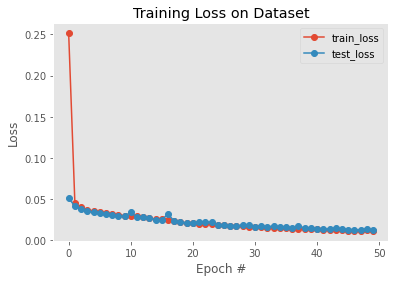

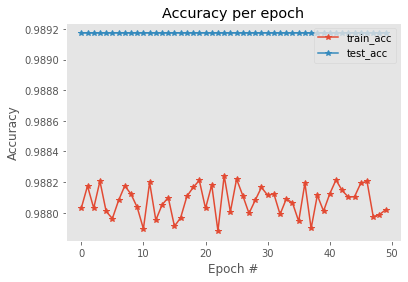

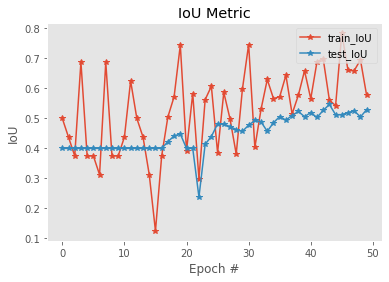

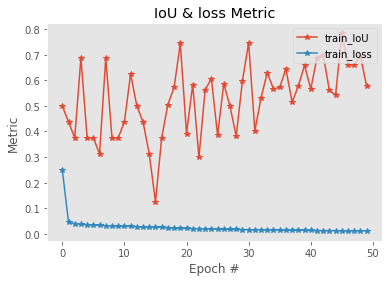

In [51]:
import matplotlib.pyplot as plt
# plot the training loss
plt.style.use("ggplot")
plt.figure()
plt.plot(H["train_loss"], label="train_loss", marker="o")
plt.plot(H["test_loss"], label="test_loss", marker="o")
plt.title("Training Loss on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="lower left")
plt.legend() 
plt.grid()
plt.savefig(config.LOSS_PLOT_PATH)

# plot the accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(H["train_acc"], label="train_acc", marker="*")
plt.plot(H["test_acc"],  label="test_acc", marker="*")
plt.title("Accuracy per epoch")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend(loc="upper right")
plt.grid()
plt.savefig(config.ACCURACY_PLOT_PATH)


# plot the IoU
plt.style.use("ggplot")
plt.figure()
plt.plot(H["train_iou"], label="train_IoU", marker="*")
plt.plot(H["test_iou"],  label="test_IoU", marker="*")
plt.title("IoU Metric")
plt.xlabel("Epoch #")
plt.ylabel("IoU")
plt.legend(loc="upper right")
plt.grid()
plt.savefig(config.IoU_PLOT_PATH)

# plot the Training IoU & Training Loss
plt.style.use("ggplot")
plt.figure()
plt.plot(H["train_iou"], label="train_IoU", marker="*")
plt.plot(H["train_loss"],  label="train_loss", marker="*")
plt.title("IoU & loss Metric")
plt.xlabel("Epoch #")
plt.ylabel("Metric")
plt.legend(loc="upper right")
plt.grid()

# serialize the model to disk
torch.save(unet, config.MODEL_PATH)

# Using Our Trained U-Net Model for Prediction - predict.py

we have trained and saved our segmentation model, we are ready to see it in action and use it for segmentation tasks.

In [52]:
# python predict.py
# import the necessary packages
from pyimagesearch import config
import matplotlib.pyplot as plt
import numpy as np
import torch
import cv2
import os

In [53]:
# To use our segmentation model for prediction, we will need a function that can take our trained model and test images, 
# predict the output segmentation mask and finally, visualize the output predictions.
def prepare_plot(origImage, origMask, predMask):
    # initialize our figure
    figure, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 10))

    # plot the original image, its mask, and the predicted mask
    ax[0].imshow(origImage)
    ax[1].imshow(origMask)
    ax[2].imshow(predMask)
    
    # set the titles of the subplots
    ax[0].set_title("Image")
    ax[1].set_title("Original Mask")
    ax[2].set_title("Predicted Mask")

    # set the layout of the figure and display it
    figure.tight_layout()
    figure.show()

In [54]:
def make_predictions(model, imagePath):
    # set model to evaluation mode
    model.eval()

    # turn off gradient tracking
    with torch.no_grad():
        # load the image from disk, swap its color channels, cast it
        # to float data type, and scale its pixel values
        image = cv2.imread(imagePath)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = image.astype("float32") / 255.0 # by deviding 255, normalize its pixel values from the standard [0-255] to the range [0, 1],
        # which our model is trained to process

        # resize the image and make a copy of it for visualization
        image = cv2.resize(image, (128, 128))
        orig = image.copy()

        # find the filename and generate the path to ground truth mask ground truth
        #  we get the path to the ground-truth mask for our test image and load the mask
        filename = imagePath.split(os.path.sep)[-1]
        groundTruthPath = os.path.join(config.MASK_DATASET_PATH, filename)
        
        # load the ground-truth segmentation mask in grayscale mode and resize it
		# Now we process our image to a format that our model can process. 
		# currently, our image has the shape [128, 128, 3]. However, 
		# our segmentation model accepts four-dimensional inputs of the format [batch_dimension, channel_dimension, height, width]

        gtMask = cv2.imread(groundTruthPath, 0)
        gtMask = cv2.resize(gtMask, (config.INPUT_IMAGE_HEIGHT,
                config.INPUT_IMAGE_HEIGHT))
        
        # make the channel axis to be the leading one, add a batch
        # dimension, create a PyTorch tensor, and flash it to the current device
        image = np.transpose(image, (2, 0, 1)) # we transpose the image to convert it to channel-first format, that is, [3, 128, 128]
        # we add an extra dimension using the expand_dims function of numpy to convert our image into a 
		# four-dimensional array (i.e., [1, 3, 128, 128]). Note that the first dimension here represents the 
		# batch dimension equal to one since we are processing one test image at a time.
		# We then convert our image to a PyTorch tensor with the help of the
		# torch.from_numpy() function and move it to the device our model
        image = np.expand_dims(image, 0)
        image = torch.from_numpy(image).to(config.DEVICE)

        # make the prediction, pass the results through the sigmoid # apply the sigmoid activation to get our predictions in the range [0, 1]
        # function, and convert the result to a NumPy array
        predMask = model(image).squeeze()
        predMask = torch.sigmoid(predMask) 
        predMask = predMask.cpu().numpy()

        # filter out the weak predictions and convert them to integers
        # Since sigmoid outputs continuous values in the range [0, 1], we use our config.THRESHOLD
        #  to binarize our output and assign the pixels, values equal to 0 or 1. 
        # This implies that anything greater than the threshold will be assigned the value 1, and others will be assigned 0.

        # multiplying it with 255 makes the final pixel values in our predMask 
		# either 0 (i.e., pixel value for black color) or 255 (i.e., pixel value for white color)
        predMask = (predMask > config.THRESHOLD) * 255
        predMask = predMask.astype(np.uint8)
        
        # prepare a plot for visualization
        prepare_plot(orig, gtMask, predMask)
        


# Prection on test images

[INFO] loading up test image paths...
[INFO] load up model...


/var/folders/9p/zsp88fz934x50v0r2w5ywp7m0000gn/T/ipykernel_8771/2369241371.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure.show()
/var/folders/9p/zsp88fz934x50v0r2w5ywp7m0000gn/T/ipykernel_8771/2369241371.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figure, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 10))


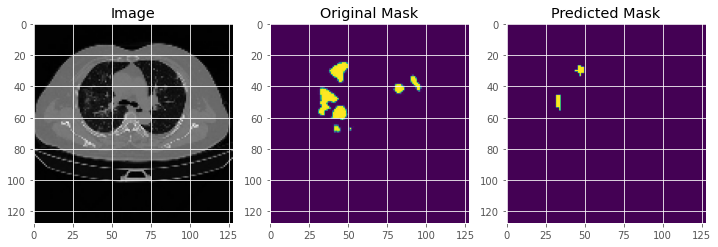

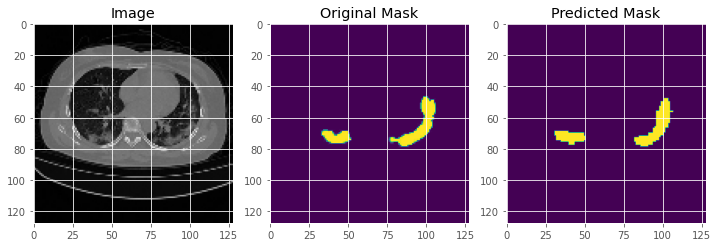

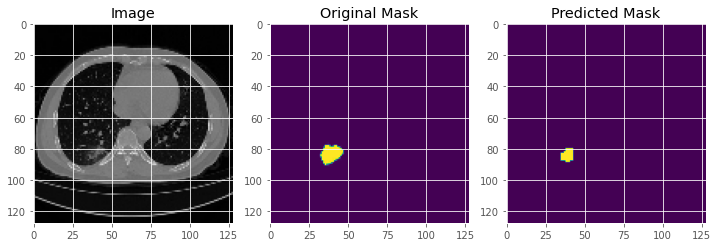

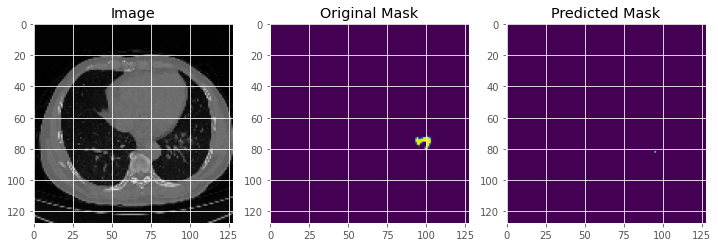

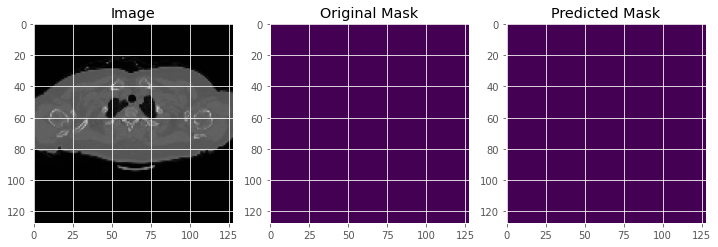

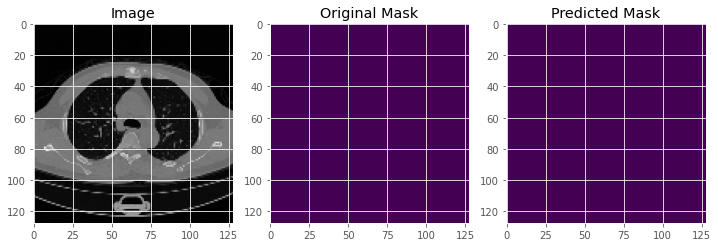

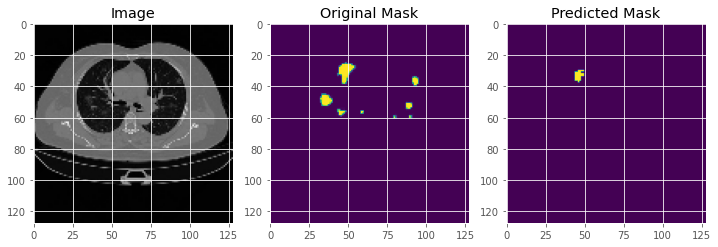

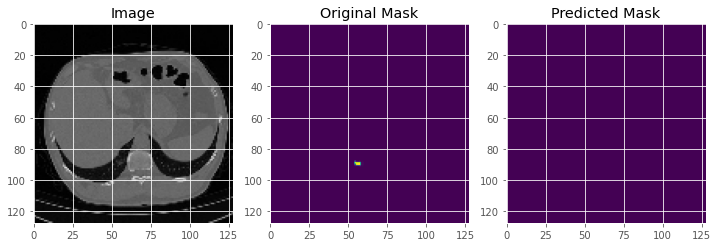

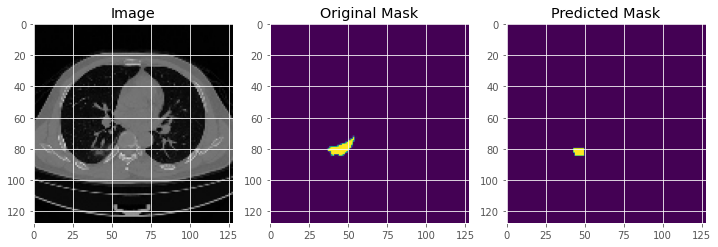

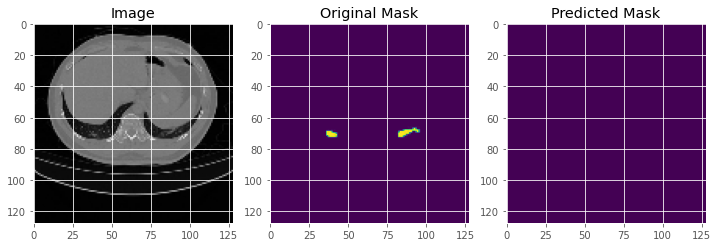

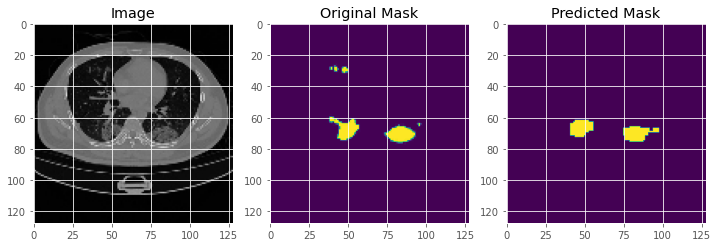

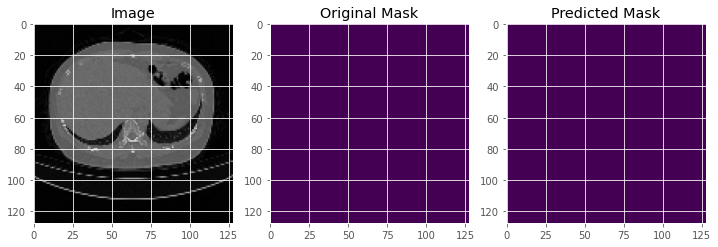

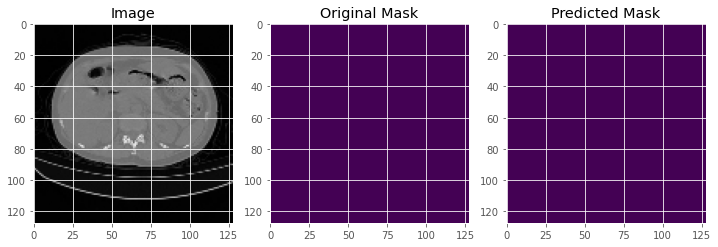

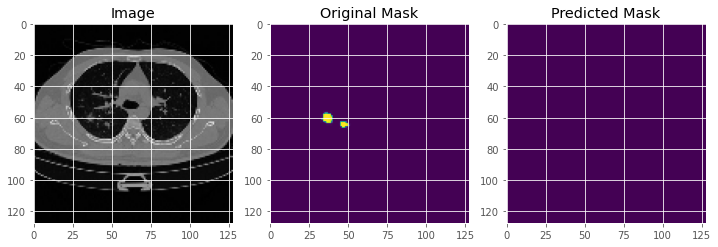

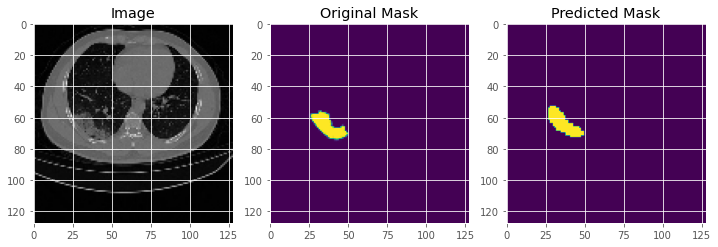

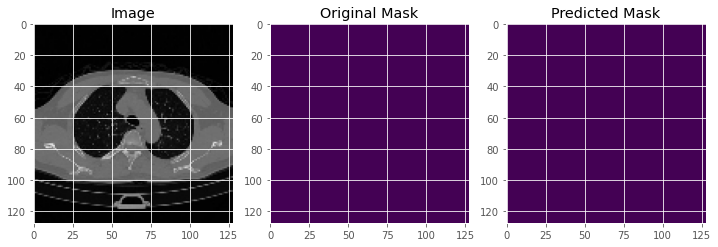

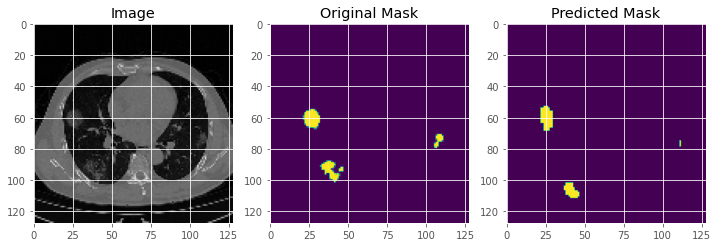

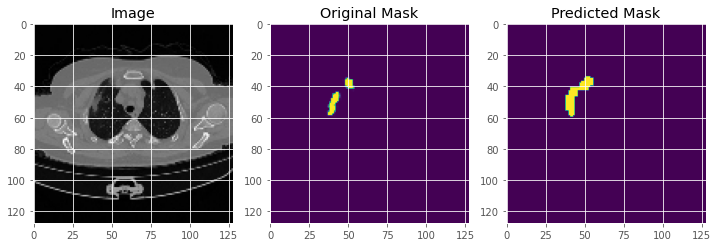

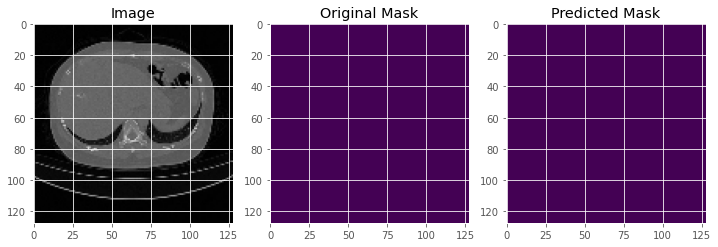

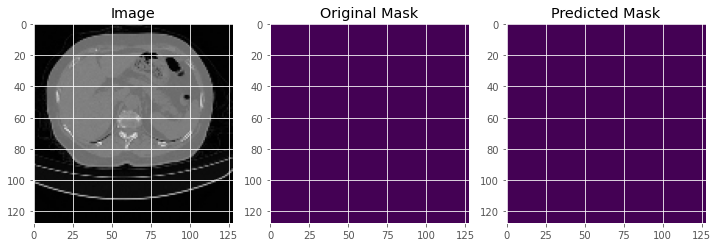

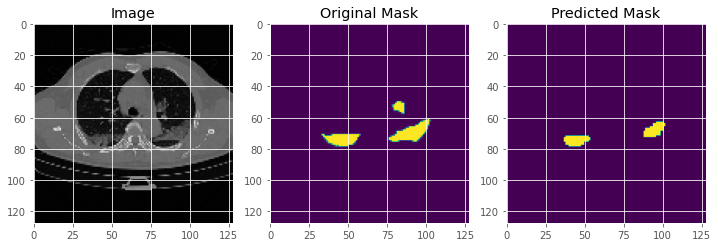

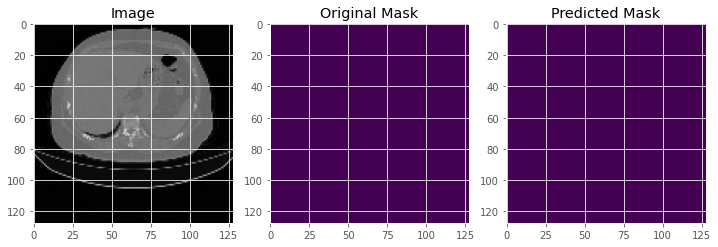

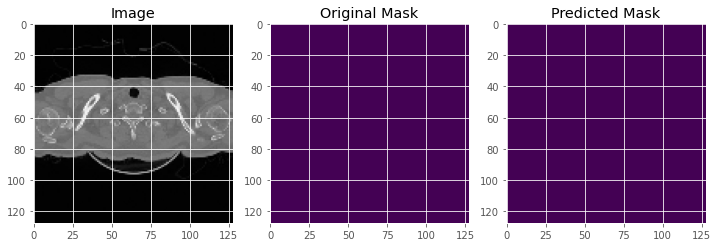

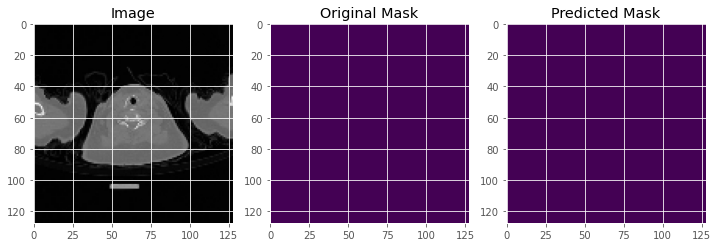

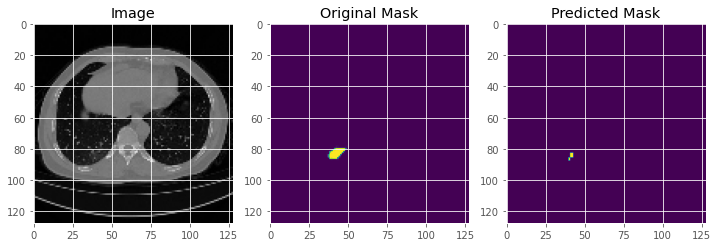

In [55]:
# below code is to see our model prediction 
# load the image paths in our testing file and randomly select 10 image paths
#  open the folder where our test image paths are stored and randomly grab 10 image paths
print("[INFO] loading up test image paths...")
imagePaths = open(config.TEST_PATHS).read().strip().split("\n")
imagePaths = np.random.choice(imagePaths, size=25)

# load our model from disk and flash it to the current device
# loads the trained weights of our U-Net from the saved checkpoint at config.MODEL_PATH
print("[INFO] load up model...")
unet = torch.load(config.MODEL_PATH).to(config.DEVICE)

# iterate over the randomly selected test image paths
for path in imagePaths:
    # make predictions and visualize the results
    # finally iterate over our randomly chosen test imagePaths and predict the outputs with the help of our make_prediction function
    make_predictions(unet, path)
